official tutorial: https://docs.pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

### prepare the MNIST dataset

In [2]:
# Normalize the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
#    transforms.Normalize((0.,), (1,))
])

# Load the MNIST dataset, without normalization
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

all_data = torch.cat([data for data, _ in train_dataset], dim=0)
min_value = torch.min(all_data)
max_value = torch.max(all_data)

# Range of values of data is important when defining autoencoder

print("minimum value of train dataset:",min_value)
print("maximum value of train dataset:",max_value)
print("\nformat of train data:", all_data.shape)

# Show labels
print ("\nLabels:", train_dataset.classes)

# tensor containing the corresponding digits of the images
print ("\nClasses:", train_dataset.targets)

minimum value of train dataset: tensor(0.)
maximum value of train dataset: tensor(1.)

format of train data: torch.Size([60000, 28, 28])

Labels: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']

Classes: tensor([5, 0, 4,  ..., 5, 6, 8])


### show some samples

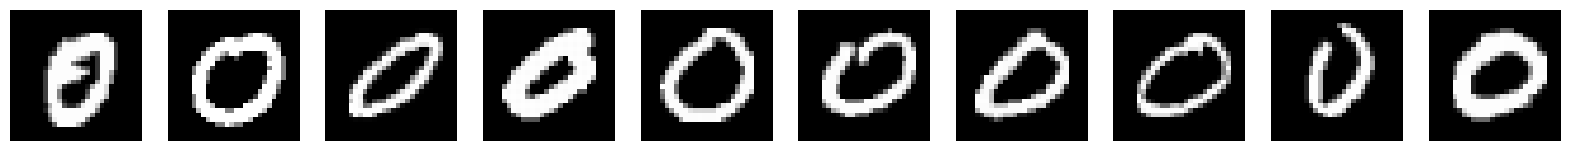

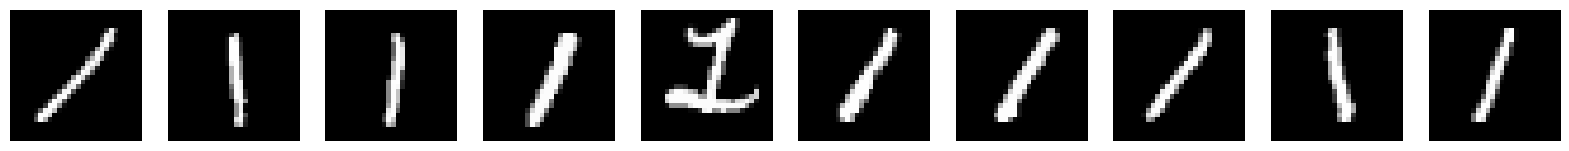

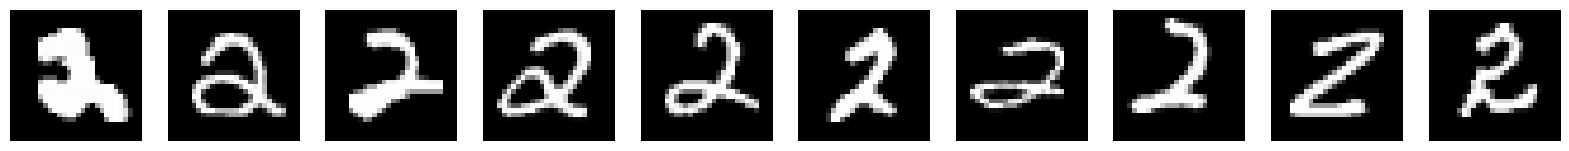

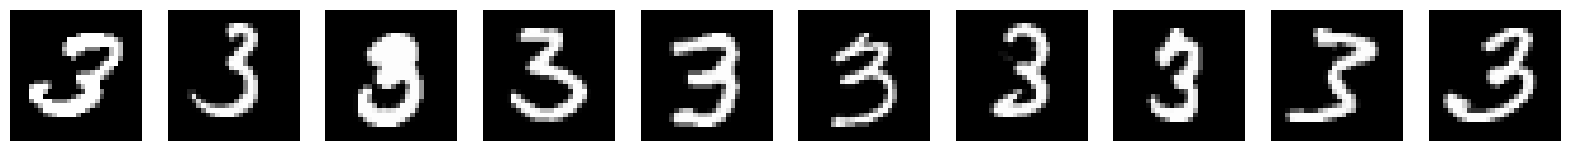

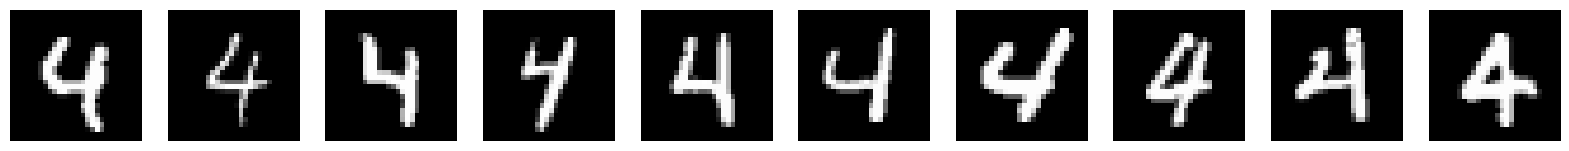

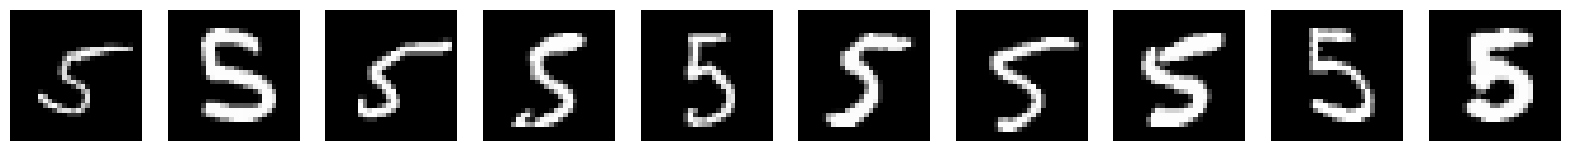

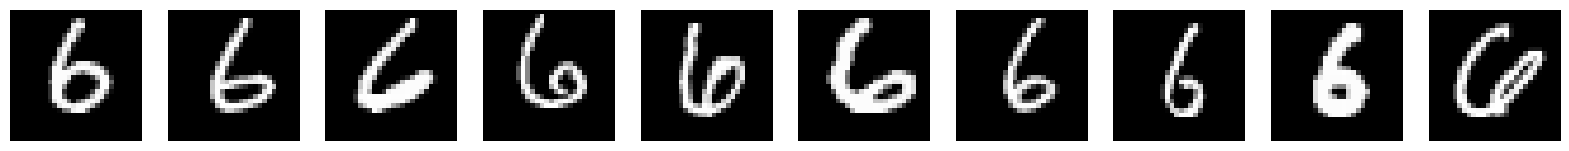

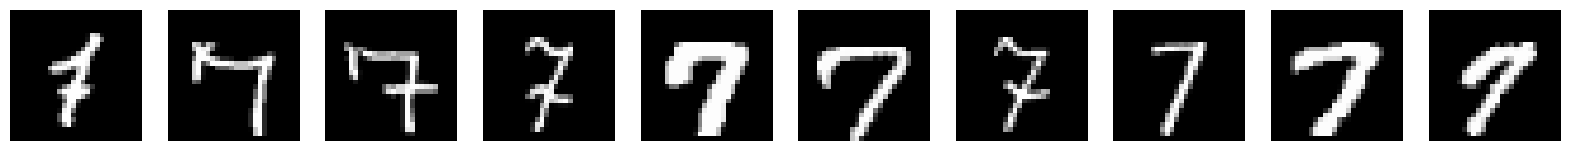

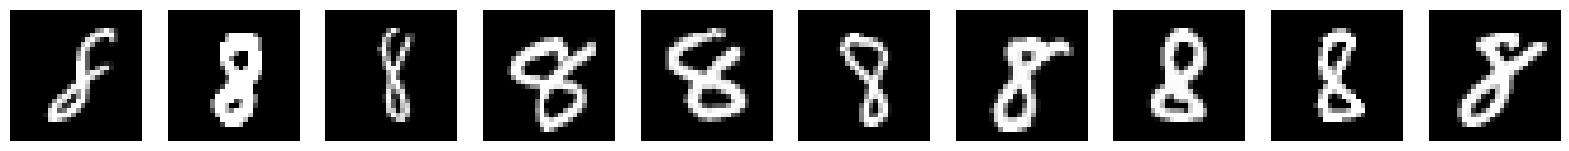

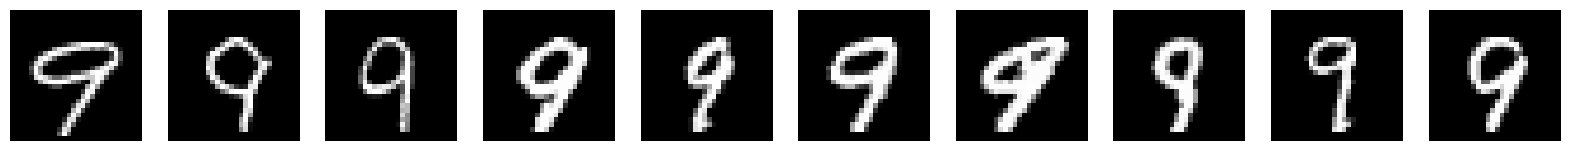

In [3]:
from collections import defaultdict
from torch.utils.data import Subset

# Dictionary to hold indices for each label
label_to_indices = defaultdict(list)

# Populate the dictionary
for idx, (_, label) in enumerate(train_dataset):
     label_to_indices[label].append(idx)

# Create a dictionary of datasets (one for each label)
label_datasets = {label: Subset(train_dataset, indices) for label, indices in label_to_indices.items()}

for label in range(10):
    
    num_examples = 10  
    label_loader = DataLoader(label_datasets[label], batch_size=num_examples, shuffle=True)

    # get a mini-batch
    for data in label_loader:
        img, _ = data
        break
        
    # Visualize some examples
    plt.figure(figsize=(20, 4))
    
    for i in range(num_examples):
        plt.subplot(2, num_examples, i + 1)
        plt.imshow(img[i].cpu().numpy().reshape(28,28), cmap='gray')
        plt.axis('off')

### define a neural network

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


evalute the function

In [5]:
out = model(all_data)
print (out.shape) 

torch.Size([60000, 10])
